In [1]:
# @hidden_cell
# The project token is an authorization token that is used to access project resources like data sources, connections, and used by platform APIs.
from project_lib import Project
project = Project(project_id='0173f8a1-9364-4a93-85fd-5a49de9c53f1', project_access_token='p-8c8d4ebd62e185973357f8daf6fe46662979370c')
pc = project.project_context

# 1. Set up the environment

Before running the code in this notebook, please make sure you have the following requirements:

A Watson Machine Learning (WML) Service instance (a free plan is offered and information about how to create an instance can be found here)

1. Local python environment configurations:
- Python 3.5
- watson-machine-learning-client
- pixiedust
- matplotlib
- seaborn
- keras

2. Download the Grape leaves dataset.

# 2. Load and explore the data

In this section, we will load the data into a pandas dataframe and perform an exploratory data analysis (EDA).


In [2]:
!rm -Rf datasetWS_DvsEvsHvsM_512-512_git

In [3]:
!git clone https://github.com/RenataUjhaziova/datasetWS_DvsEvsHvsM_512-512_git.git

Cloning into 'datasetWS_DvsEvsHvsM_512-512_git'...
remote: Enumerating objects: 292, done.
remote: Counting objects: 100% (292/292), done.
remote: Compressing objects: 100% (290/290), done.
remote: Total 292 (delta 0), reused 289 (delta 0), pack-reused 0
Receiving objects: 100% (292/292), 49.26 MiB | 39.68 MiB/s, done.


In [4]:
!ls

4_class_ANN_cv_model_DvsEvsHvsM_v1_weights.h5
4_class_ANN_model_DvsEvsHvsM_v1_weights.h5
class_4_ANN_cv_model_DvsEvsHvsM_v1.h5
class_4_ANN_cv_model_DvsEvsHvsM_v1_weights.h5
class_4_ANN_model_DvsEvsHvsM_v1-1.h5
class_4_ANN_model_DvsEvsHvsM_v1-1_weights.h5
class_4_ANN_model_DvsEvsHvsM_v1.h5
datasetWS_DvsEvsHvsM_512-512_git


In [5]:
%cd ./datasetWS_DvsEvsHvsM_512-512_git/

/home/dsxuser/work/datasetWS_DvsEvsHvsM_512-512_git


In [6]:
!pip install opencv-python 

tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.


In [7]:
# Get the data.
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# read images
def read_images(path):
    print('Reading from', path)
    files = [file for file in os.listdir(path)]
    image = cv2.imread(path+files[0])
    images = np.zeros(shape=(len(files), 512, 512, image.shape[2]))
    for i in range(len(files)):
        image = cv2.imread(path+files[i])
        images[i,:,:,:] = cv2.resize(image,(512,512))
    return images

In [9]:
healthy_train = read_images(path= '../datasetWS_DvsEvsHvsM_512-512_git/training_set/healthy/')
esca_train = read_images(path= '../datasetWS_DvsEvsHvsM_512-512_git/training_set/esca/')
dry_train = read_images(path= '../datasetWS_DvsEvsHvsM_512-512_git/training_set/dry/')
mite_train = read_images(path= '../datasetWS_DvsEvsHvsM_512-512_git/training_set/mite/')

Reading from ../datasetWS_DvsEvsHvsM_512-512_git/training_set/healthy/
Reading from ../datasetWS_DvsEvsHvsM_512-512_git/training_set/esca/
Reading from ../datasetWS_DvsEvsHvsM_512-512_git/training_set/dry/
Reading from ../datasetWS_DvsEvsHvsM_512-512_git/training_set/mite/


In [10]:
healthy_test = read_images(path= '../datasetWS_DvsEvsHvsM_512-512_git/test_set/healthy/')
esca_test = read_images(path= '../datasetWS_DvsEvsHvsM_512-512_git/test_set/esca/')
dry_test = read_images(path= '../datasetWS_DvsEvsHvsM_512-512_git/test_set/dry/')
mite_test = read_images(path= '../datasetWS_DvsEvsHvsM_512-512_git/test_set/mite/')

Reading from ../datasetWS_DvsEvsHvsM_512-512_git/test_set/healthy/
Reading from ../datasetWS_DvsEvsHvsM_512-512_git/test_set/esca/
Reading from ../datasetWS_DvsEvsHvsM_512-512_git/test_set/dry/
Reading from ../datasetWS_DvsEvsHvsM_512-512_git/test_set/mite/


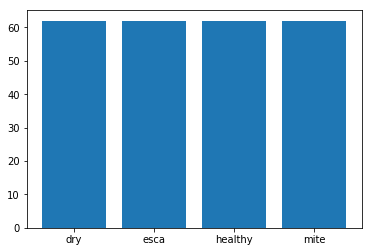

In [11]:
# record count in each classes
plt.figure(0)
plt.bar(['dry', 'esca', 'healthy', 'mite'],\
        [healthy_train.shape[0] + healthy_test.shape[0],
         esca_train.shape[0] + esca_test.shape[0], 
         dry_train.shape[0] + dry_test.shape[0], 
         mite_train.shape[0] + mite_test.shape[0]])
plt.show()

In [12]:
# create dataframe
import pandas as pd

In [13]:
data = pd.DataFrame(columns=['hist_data', 'label'])
def append_to_df(img_array, df, label):
    for image in img_array:
        hist_b = np.histogram(image[:,:,0], bins=30, density=True, range=(0,255))[0]
        hist_g = np.histogram(image[:,:,1], bins=30, density=True, range=(0,255))[0]
        hist_r = np.histogram(image[:,:,2], bins=30, density=True, range=(0,255))[0]
        hist = np.append(np.append(hist_r, hist_g), hist_b)
        df = df.append({'hist_data': hist, 'label': label}, ignore_index=True)
    return df

In [14]:
data = append_to_df(dry_train, data,0)
data = append_to_df(dry_test, data,0)
data = append_to_df(esca_train, data,1)
data = append_to_df(esca_test, data,1)
data = append_to_df(healthy_train, data,2)
data = append_to_df(healthy_test, data,2)
data = append_to_df(mite_train, data,3)
data = append_to_df(mite_test, data,3)

In [15]:
data.head(20)

,hist_data,label
0,"[2.69272748162e-06, 1.07709099265e-05, 0.00014...",0
1,"[0.0, 0.0, 2.87224264706e-05, 0.00014495849609...",0
2,"[4.03909122243e-06, 9.42454618566e-06, 4.03909...",0
3,"[8.97575827206e-06, 9.24503102022e-05, 0.00115...",0
4,"[2.69272748162e-06, 3.63518210018e-05, 0.00055...",0
5,"[4.48787913603e-07, 4.03909122243e-05, 0.00103...",0
6,"[4.48787913603e-07, 3.14151539522e-06, 2.10930...",0
7,"[4.48787913603e-06, 5.02642463235e-05, 0.00053...",0
8,"[1.03221220129e-05, 6.82157628676e-05, 0.00048...",0
9,"[3.14151539522e-06, 2.42345473346e-05, 0.00029...",0


In [16]:
# creating variables and labes
X = np.stack(data['hist_data'].values)
y = data['label'].values.astype(int)

In [17]:
# splitting the dataset into the Training and Testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 0)

# List the number of records in each data set.
print('Number of training records: ' + str(len(X_train)))
print('Number of testing records : ' + str(len(X_test)))

Number of training records: 186
Number of testing records : 62


## 2.1 Prepare validation data

In [18]:
healthy_val = read_images(path= '../datasetWS_DvsEvsHvsM_512-512_git/validation_set/healthy/')
esca_val = read_images(path= '../datasetWS_DvsEvsHvsM_512-512_git/validation_set/esca/')
dry_val = read_images(path= '../datasetWS_DvsEvsHvsM_512-512_git/validation_set/dry/')
mite_val = read_images(path= '../datasetWS_DvsEvsHvsM_512-512_git/validation_set/mite/')

Reading from ../datasetWS_DvsEvsHvsM_512-512_git/validation_set/healthy/
Reading from ../datasetWS_DvsEvsHvsM_512-512_git/validation_set/esca/
Reading from ../datasetWS_DvsEvsHvsM_512-512_git/validation_set/dry/
Reading from ../datasetWS_DvsEvsHvsM_512-512_git/validation_set/mite/


In [19]:
data_val = pd.DataFrame(columns=['hist_data', 'label'])

In [20]:
data_val = append_to_df(dry_val, data_val,0)
data_val = append_to_df(esca_val, data_val,1)
data_val = append_to_df(healthy_val, data_val,2)
data_val = append_to_df(mite_val, data_val,3)

In [21]:
# creating variables and labes
X_val = np.stack(data_val['hist_data'].values)
y_val = data_val['label'].values.astype(int)

# 3. Build the Model

In [22]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_val = sc.transform(X_val)

In [23]:
# Importing the Keras libraries and packages
import keras

Using TensorFlow backend.


In [24]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping

In [25]:
# convert class vectors to binary class matrices
num_classes = 4
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)

In [26]:
ANN_model = Sequential()

In [27]:
# Adding the input layer and the first hidden layer
ANN_model.add(Dense(output_dim = 45, 
                    init = 'uniform', 
                    activation = 'relu', 
                    input_dim = 90))

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=45, activation="relu", input_dim=90, kernel_initializer="uniform")`
  from ipykernel import kernelapp as app


In [28]:
# Adding the second hidden layer
ANN_model.add(Dense(output_dim = 45, 
                    init = 'uniform', 
                    activation = 'relu'))

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=45, activation="relu", kernel_initializer="uniform")`
  from ipykernel import kernelapp as app


In [29]:
# Adding the output layer
ANN_model.add(Dense(output_dim = 4, 
                    init = 'uniform', 
                    activation = 'softmax'))

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=4, activation="softmax", kernel_initializer="uniform")`
  from ipykernel import kernelapp as app


In [30]:
# Compiling the ANN
ANN_model.compile(optimizer = 'adam', 
                  loss = 'categorical_crossentropy', 
                  metrics = ['accuracy'])

## 3.1 Train the model

In [31]:
from IPython.display import clear_output

In [32]:
class PlotLearning(Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        self.acc = []
        self.val_acc = []
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.acc.append(logs.get('acc'))
        self.val_acc.append(logs.get('val_acc'))
        self.i += 1
        f, (ax1, ax2) = plt.subplots(1, 2, sharex=True)
        
        clear_output(wait=True)
        
        ax1.set_yscale('log')
        ax1.plot(self.x, self.losses, label="loss")
        ax1.plot(self.x, self.val_losses, label="val_loss")
        ax1.legend()
        
        ax2.plot(self.x, self.acc, label="accuracy")
        ax2.plot(self.x, self.val_acc, label="validation accuracy")
        ax2.legend()
        
        plt.show();
        
plot_learning = PlotLearning()

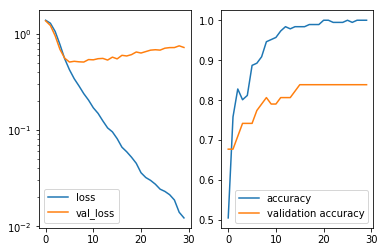

In [33]:
# Fitting the ANN to the Training set
ANN_model.fit(X_train, y_train, batch_size = 10, 
              nb_epoch = 30, 
              validation_data=(X_test, y_test), 
              callbacks=[plot_learning])

### 3.2 Test the Model

In [34]:
ANN_model_result_path = "/home/dsxuser/work/datasetWS_DvsEvsHvsM_512-512_git/class_4_ANN_model_DvsEvsHvsM_v1-1.h5"
ANN_model.save(ANN_model_result_path)

In [35]:
ANN_model.save_weights('/home/dsxuser/work/datasetWS_DvsEvsHvsM_512-512_git/class_4_ANN_model_DvsEvsHvsM_v1-1_weights.h5')

In [36]:
score_train = ANN_model.evaluate(X_train, y_train, verbose=0)

In [37]:
print("Loss = ", score_train[0], ", Accuracy = ", score_train[1])

Loss =  0.0115081071052 , Accuracy =  1.0


In [38]:
score_test = ANN_model.evaluate(X_test, y_test, verbose=0)

In [39]:
print("Loss = ", score_test[0], ", Accuracy = ", score_test[1])

Loss =  0.718779088989 , Accuracy =  0.838709665883


In [40]:
score_val = ANN_model.evaluate(X_val, y_val, verbose=0)

In [41]:
print("Loss = ", score_val[0], ", Accuracy = ", score_val[1])

Loss =  0.589118480682 , Accuracy =  0.833333313465


In [42]:
ANN_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 45)                4095      
_________________________________________________________________
dense_2 (Dense)              (None, 45)                2070      
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 184       
Total params: 6,349
Trainable params: 6,349
Non-trainable params: 0
_________________________________________________________________


## 3.3 Accuracy Testing

Accuracy testing of test dataset.

In [43]:
#predictions_test
predictions_test = ANN_model.predict(X_test)

In [44]:
y_pred_test =[]
for i in range(len(predictions_test)):
    y_pred_test.append(np.argmax(predictions_test[i]))
print(y_pred_test)

[3, 2, 3, 2, 2, 1, 0, 2, 3, 1, 1, 1, 1, 3, 3, 3, 0, 1, 3, 1, 3, 1, 2, 1, 0, 3, 0, 1, 1, 3, 1, 0, 3, 1, 2, 0, 0, 2, 0, 2, 3, 2, 1, 2, 1, 2, 3, 2, 1, 3, 1, 0, 3, 0, 1, 0, 3, 3, 2, 2, 1, 2]


In [45]:
y_test

array([[ 0.,  0.,  0.,  1.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.],
       [ 1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.],
       [ 1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  

In [46]:
y_test_labels = [ np.where(r==1)[0][0] for r in y_test ]
y_test_labels

[3,
 2,
 1,
 2,
 2,
 1,
 0,
 2,
 3,
 3,
 1,
 3,
 1,
 2,
 2,
 3,
 0,
 1,
 3,
 1,
 3,
 2,
 2,
 1,
 0,
 3,
 0,
 1,
 1,
 1,
 1,
 0,
 3,
 1,
 2,
 0,
 0,
 2,
 0,
 2,
 3,
 3,
 1,
 2,
 1,
 2,
 3,
 2,
 1,
 3,
 1,
 0,
 3,
 0,
 1,
 0,
 3,
 2,
 2,
 2,
 3,
 2]

In [47]:
ctr_test=0
for i in range(len(y_pred_test)):
    if y_pred_test[i] == y_test_labels[i]:
        ctr_test=ctr_test+1
res_test = ctr_test/len(y_pred_test)*100
print(res_test)

83.87096774193549


Accuracy testing of validation data set.

In [48]:
#predictions_test
predictions_val = ANN_model.predict(X_val)

In [49]:
y_pred_val =[]
for i in range(len(predictions_val)):
    y_pred_val.append(np.argmax(predictions_val[i]))
print(y_pred_val)

[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 3, 2, 2, 2, 2, 2, 3, 1, 1, 3, 1, 3]


In [50]:
y_val

array([[ 1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.]])

In [51]:
y_val_labels = [ np.where(r==1)[0][0] for r in y_val ]
y_val_labels

[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3]

In [52]:
ctr_val=0
for i in range(len(y_pred_val)):
    if y_pred_val[i] == y_val_labels[i]:
        ctr_val=ctr_val+1
res_val = ctr_val/len(y_pred_val)*100
print(res_val)

83.33333333333334


## 3.4 Confusion matrix

Confusion matrix for test dataset.

In [53]:
from sklearn.metrics import confusion_matrix

In [54]:
# confusion matrix for test data
y_actu_test = y_test_labels

In [55]:
y_pred_test = y_pred_test

In [56]:
!pip install pycm

tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.


In [57]:
from pycm import *

Confusion matrix for test dataset.

In [58]:
cm_test = ConfusionMatrix(actual_vector=y_actu_test, predict_vector=y_pred_test) 

In [59]:
cm_test.classes

[0, 1, 2, 3]

In [60]:
cm_test.table

{0: {0: 11, 1: 0, 2: 0, 3: 0},
 1: {0: 0, 1: 15, 2: 0, 3: 2},
 2: {0: 0, 1: 1, 2: 14, 3: 3},
 3: {0: 0, 1: 3, 2: 1, 3: 12}}

In [61]:
cm_test.print_matrix()

Predict  0        1        2        3        
Actual
0        11       0        0        0        

1        0        15       0        2        

2        0        1        14       3        

3        0        3        1        12       




Confusion matrix for validation dataset.

In [62]:
# confusion matrix for validation data
y_actu_val = y_val_labels

In [63]:
# confusion matrix for validation data
y_pred_val = y_pred_val

In [64]:
cm_val = ConfusionMatrix(actual_vector=y_actu_val, predict_vector=y_pred_val)

In [65]:
cm_val.classes

[0, 1, 2, 3]

In [66]:
cm_val.table

{0: {0: 6, 1: 0, 2: 0, 3: 0},
 1: {0: 0, 1: 6, 2: 0, 3: 0},
 2: {0: 0, 1: 0, 2: 5, 3: 1},
 3: {0: 0, 1: 3, 2: 0, 3: 3}}

In [67]:
#print(cm_val)
cm_val.print_matrix()

Predict 0       1       2       3       
Actual
0       6       0       0       0       

1       0       6       0       0       

2       0       0       5       1       

3       0       3       0       3       




## 4. Build the Model using cross validation 

## 4.1 Train the model

In [68]:
from sklearn.model_selection import StratifiedKFold

In [69]:
seed = 7
np.random.seed(seed)

In [70]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, 
                        random_state=seed)

In [71]:
for train, test in kfold.split(X, y):
    cv_model = Sequential()
    cv_model.add(Dense(output_dim = 45, 
                       init = 'uniform', 
                       activation = 'relu', 
                       input_dim = 90))
    cv_model.add(Dense(output_dim = 45, 
                       init = 'uniform', 
                       activation = 'relu'))
    cv_model.add(Dense(output_dim = 4, 
                       init = 'uniform', 
                       activation = 'softmax'))
    
    # Compiling the ANN model
    cv_model.compile(optimizer = 'adam', 
                     loss = 'categorical_crossentropy', 
                     metrics = ['accuracy'])
    
    # Fitting the ANN model
    cv_model.fit(X_train, y_train, batch_size = 10, 
                 nb_epoch = 30, verbose=1,
                 validation_data=(X_test, y_test))

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=45, activation="relu", input_dim=90, kernel_initializer="uniform")`
  app.launch_new_instance()
/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=45, activation="relu", kernel_initializer="uniform")`
/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=4, activation="softmax", kernel_initializer="uniform")`
/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 186 samples, validate on 62 samples
Epoch 1/30
186/186 [==============================] - 0s 851us/step - loss: 1.3708 - acc: 0.6075 - val_loss: 1.3467 - val_acc: 0.6129
Epoch 2/30
186/186 [==============================] - 0s 160us/step - loss: 1.2517 - acc: 0.7204 - val_loss: 1.1593 - val_acc: 0.5645
Epoch 3/30
186/186 [==============================] - 0s 162us/step - loss: 1.0099 - acc: 0.6720 - val_loss: 0.9411 - val_acc: 0.6129
Epoch 4/30
186/186 [==============================] - 0s 163us/step - loss: 0.7783 - acc: 0.7366 - val_loss: 0.7273 - val_acc: 0.7419
Epoch 5/30
186/186 [==============================] - 0s 166us/step - loss: 0.5811 - acc: 0.7903 - val_loss: 0.5778 - val_acc: 0.7581
Epoch 6/30
186/186 [==============================] - 0s 162us/step - loss: 0.4454 - acc: 0.8280 - val_loss: 0.5308 - val_acc: 0.7581
Epoch 7/30
186/186 [==============================] - 0s 165us/step - loss: 0.3612 - acc: 0.8763 - val_loss: 0.5060 - val_acc: 0.7903
Epoch 8/30
186/18

186/186 [==============================] - 0s 1ms/step - loss: 1.3711 - acc: 0.4624 - val_loss: 1.3427 - val_acc: 0.5323
Epoch 2/30
186/186 [==============================] - 0s 176us/step - loss: 1.2449 - acc: 0.6398 - val_loss: 1.1463 - val_acc: 0.5806
Epoch 3/30
186/186 [==============================] - 0s 162us/step - loss: 0.9933 - acc: 0.6022 - val_loss: 0.9157 - val_acc: 0.5806
Epoch 4/30
186/186 [==============================] - 0s 166us/step - loss: 0.7937 - acc: 0.6559 - val_loss: 0.7496 - val_acc: 0.6452
Epoch 5/30
186/186 [==============================] - 0s 163us/step - loss: 0.6352 - acc: 0.7312 - val_loss: 0.6440 - val_acc: 0.8548
Epoch 6/30
186/186 [==============================] - 0s 169us/step - loss: 0.5178 - acc: 0.8548 - val_loss: 0.5888 - val_acc: 0.7742
Epoch 7/30
186/186 [==============================] - 0s 169us/step - loss: 0.4245 - acc: 0.8656 - val_loss: 0.5675 - val_acc: 0.7258
Epoch 8/30
186/186 [==============================] - 0s 174us/step - loss:

186/186 [==============================] - 0s 2ms/step - loss: 1.3672 - acc: 0.5215 - val_loss: 1.3368 - val_acc: 0.5323
Epoch 2/30
186/186 [==============================] - 0s 174us/step - loss: 1.2142 - acc: 0.6129 - val_loss: 1.1276 - val_acc: 0.5323
Epoch 3/30
186/186 [==============================] - 0s 181us/step - loss: 0.9851 - acc: 0.5860 - val_loss: 0.9208 - val_acc: 0.6774
Epoch 4/30
186/186 [==============================] - 0s 175us/step - loss: 0.7823 - acc: 0.7204 - val_loss: 0.7566 - val_acc: 0.6935
Epoch 5/30
186/186 [==============================] - 0s 179us/step - loss: 0.6117 - acc: 0.8065 - val_loss: 0.6422 - val_acc: 0.6935
Epoch 6/30
186/186 [==============================] - 0s 173us/step - loss: 0.4796 - acc: 0.8441 - val_loss: 0.5819 - val_acc: 0.6935
Epoch 7/30
186/186 [==============================] - 0s 171us/step - loss: 0.3925 - acc: 0.8925 - val_loss: 0.5543 - val_acc: 0.6774
Epoch 8/30
186/186 [==============================] - 0s 171us/step - loss:

In [72]:
# save the model
cv_model_result_path = "/home/dsxuser/work/datasetWS_DvsEvsHvsM_512-512_git/class_4_ANN_cv_model_DvsEvsHvsM_v1.h5"
cv_model.save(cv_model_result_path)

In [73]:
cv_model.save_weights('/home/dsxuser/work/datasetWS_DvsEvsHvsM_512-512_git/class_4_ANN_cv_model_DvsEvsHvsM_v1_weights.h5')

## 4.2 Test the Model 

In [74]:
score_train_cv = cv_model.evaluate(X_train, y_train, verbose=0)
print("Loss = ", score_train_cv[0], ", Accuracy = ", score_train_cv[1])

Loss =  0.0175027598537 , Accuracy =  1.0


In [75]:
score_test_cv = cv_model.evaluate(X_test, y_test, verbose=0)
print("Loss = ", score_test_cv[0], ", Accuracy = ", score_test_cv[1])

Loss =  0.700656642837 , Accuracy =  0.838709665883


In [76]:
score_val_cv = cv_model.evaluate(X_val, y_val, verbose=0)
print("Loss = ", score_val_cv[0], ", Accuracy = ", score_val_cv[1])

Loss =  0.635840713978 , Accuracy =  0.833333313465


## 4.3 Accuracy Testing

Accuracy testing of test dataset.

In [77]:
#predictions_test
predictions_test_cv = cv_model.predict(X_test)

In [78]:
y_pred_test_cv =[]
for i in range(len(predictions_test_cv)):
    y_pred_test_cv.append(np.argmax(predictions_test_cv[i]))
print(y_pred_test_cv)

[3, 2, 3, 2, 2, 1, 0, 2, 3, 1, 1, 1, 1, 3, 3, 3, 0, 1, 3, 1, 3, 1, 2, 1, 0, 3, 0, 1, 1, 3, 1, 0, 3, 1, 2, 0, 0, 2, 0, 2, 3, 2, 1, 2, 1, 2, 3, 2, 1, 3, 1, 0, 3, 0, 1, 0, 3, 3, 2, 2, 1, 2]


In [79]:
y_test

array([[ 0.,  0.,  0.,  1.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.],
       [ 1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.],
       [ 1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  

In [80]:
y_test_labels_cv = [ np.where(r==1)[0][0] for r in y_test ]
y_test_labels_cv

[3,
 2,
 1,
 2,
 2,
 1,
 0,
 2,
 3,
 3,
 1,
 3,
 1,
 2,
 2,
 3,
 0,
 1,
 3,
 1,
 3,
 2,
 2,
 1,
 0,
 3,
 0,
 1,
 1,
 1,
 1,
 0,
 3,
 1,
 2,
 0,
 0,
 2,
 0,
 2,
 3,
 3,
 1,
 2,
 1,
 2,
 3,
 2,
 1,
 3,
 1,
 0,
 3,
 0,
 1,
 0,
 3,
 2,
 2,
 2,
 3,
 2]

In [81]:
ctr_test_cv=0
for i in range(len(y_pred_test_cv)):
    if y_pred_test_cv[i] == y_test_labels_cv[i]:
        ctr_test_cv=ctr_test_cv+1
res_test_cv = ctr_test_cv/len(y_pred_test_cv)*100
print(res_test_cv)

83.87096774193549


Accuracy testing of validation data set.

In [82]:
#predictions_test
predictions_val_cv = cv_model.predict(X_val)

In [83]:
y_pred_val_cv =[]
for i in range(len(predictions_val_cv)):
    y_pred_val_cv.append(np.argmax(predictions_val_cv[i]))
print(y_pred_val_cv)

[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 3, 2, 2, 2, 2, 2, 3, 1, 1, 3, 1, 3]


In [84]:
y_val

array([[ 1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.]])

In [85]:
y_val_labels_cv = [ np.where(r==1)[0][0] for r in y_val ]
y_val_labels_cv

[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3]

In [86]:
ctr_val_cv=0
for i in range(len(y_pred_val_cv)):
    if y_pred_val_cv[i] == y_val_labels_cv[i]:
        ctr_val_cv=ctr_val_cv+1
res_val_cv = ctr_val_cv/len(y_pred_val_cv)*100
print(res_val_cv)

83.33333333333334


## 4.4 Confusion matrix

Confusion matrix for test dataset.

In [87]:
# confusion matrix for test data
y_actu_test_cv = y_test_labels_cv
y_pred_test_cv = y_pred_test_cv
cm_test_cv = ConfusionMatrix(actual_vector=y_actu_test_cv, predict_vector=y_pred_test_cv) 

In [88]:
cm_test_cv.classes

[0, 1, 2, 3]

In [89]:
cm_test_cv.table

{0: {0: 11, 1: 0, 2: 0, 3: 0},
 1: {0: 0, 1: 15, 2: 0, 3: 2},
 2: {0: 0, 1: 1, 2: 14, 3: 3},
 3: {0: 0, 1: 3, 2: 1, 3: 12}}

In [90]:
cm_test_cv.print_matrix()

Predict  0        1        2        3        
Actual
0        11       0        0        0        

1        0        15       0        2        

2        0        1        14       3        

3        0        3        1        12       




Confusion matrix for validation dataset.

In [91]:
# confusion matrix for test data
y_actu_val_cv = y_val_labels_cv
y_pred_val_cv = y_pred_val_cv
cm_val_cv = ConfusionMatrix(actual_vector=y_actu_val_cv, predict_vector=y_pred_val_cv)

In [92]:
cm_val_cv.classes

[0, 1, 2, 3]

In [93]:
cm_val_cv.table

{0: {0: 6, 1: 0, 2: 0, 3: 0},
 1: {0: 0, 1: 6, 2: 0, 3: 0},
 2: {0: 0, 1: 0, 2: 5, 3: 1},
 3: {0: 0, 1: 3, 2: 0, 3: 3}}

In [94]:
#print(cm_val)
cm_val_cv.print_matrix()

Predict 0       1       2       3       
Actual
0       6       0       0       0       

1       0       6       0       0       

2       0       0       5       1       

3       0       3       0       3       




# 5. Persist the model

In this section, we will show how to use the watson-machine-learning-client package to store your ANN model in the WML repository.

In [95]:
!rm -rf $PIP_BUILD/watson-machine-learning-client

In [96]:
!pip install watson-machine-learning-client

tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.


In [97]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [98]:
wml_credentials={
    'url': 'https://us-south.ml.cloud.ibm.com',
    'access_key': '1i_a51p0p4pg-wRnOy3XdLwHrxzURhXz2_dERELy_RR-',
    'username': '68c5e0c2-16df-4265-9846-3c382fd66494',
    'password': 'b696c9e3-d790-41c6-900d-580a64f9ccbb',
    'instance_id': '985d7680-d220-4984-85e1-31cf24cd3369'
}

In [99]:
client = WatsonMachineLearningAPIClient(wml_credentials)

## 5.1 Save the ANN model in the WML Repository

Save the model artifact as model for image recognition to WML instance.

#### Step 1: Save your model to .h5 file.

In [100]:
#ANN_model_result_path = "/home/dsxuser/work/datasetWS_DvsEvsHvsM_512-512_git/class_4_ANN_model_DvsEvsHvsM_v1-1.h5"
#ANN_model.save(ANN_model_result_path)

In [101]:
cv_model_result_path = "/home/dsxuser/work/datasetWS_DvsEvsHvsM_512-512_git/class_4_ANN_cv_model_DvsEvsHvsM_v1.h5"
cv_model.save(cv_model_result_path)

In [102]:
!ls

class_4_ANN_cv_model_DvsEvsHvsM_v1.h5	       README.md
class_4_ANN_cv_model_DvsEvsHvsM_v1_weights.h5  test_set
class_4_ANN_model_DvsEvsHvsM_v1-1.h5	       training_set
class_4_ANN_model_DvsEvsHvsM_v1-1_weights.h5   validation_set


#### Step 2: compress .h5 file to tgz.

In [103]:
#!tar -zcvf class_4_ANN_model_DvsEvsHvsM_v1-1.tgz class_4_ANN_model_DvsEvsHvsM_v1-1.h5

In [104]:
!tar -zcvf class_4_ANN_cv_model_DvsEvsHvsM_v1.tgz class_4_ANN_cv_model_DvsEvsHvsM_v1.h5

class_4_ANN_cv_model_DvsEvsHvsM_v1.h5


#### Step 3: Important > For deploying a keras model, it is mandatory to pass the FRAMEWORK_LIBRARIES along with other metaprops

In [105]:
metadata = {
         client.repository.ModelMetaNames.NAME: 'ANN cv model for grape leaves disease classification v1-1',
         client.repository.ModelMetaNames.FRAMEWORK_NAME: 'tensorflow',
         client.repository.ModelMetaNames.FRAMEWORK_VERSION: '1.5',
         client.repository.ModelMetaNames.RUNTIME_NAME: 'python',
         client.repository.ModelMetaNames.RUNTIME_VERSION: '3.5',
         client.repository.ModelMetaNames.FRAMEWORK_LIBRARIES: [{'name':'keras', 'version': '2.1.3'}]
}

#### Step 4: Store the model.

In [106]:
published_model = client.repository.store_model(model='class_4_ANN_cv_model_DvsEvsHvsM_v1.tgz', meta_props=metadata)

In [107]:
# Display a list of all the models.
client.repository.list_models()

------------------------------------  ------------------------------------------------------------  ------------------------  -----------------
GUID                                  NAME                                                          CREATED                   FRAMEWORK
f79bb1c3-2ab2-46de-bf24-cf1cf74ccfd4  ANN cv model for grape leaves disease classification v1-1     2019-07-09T09:14:57.196Z  tensorflow-1.5
f3c83ce3-f555-4de5-8faa-791443690bc5  KNN model for grape leaves disease classification             2019-07-07T19:32:03.713Z  scikit-learn-0.19
fc015b39-38b7-4433-aa34-3e3dab3ffc9f  CNN model for grape leaves disease classification 128-128 v3  2019-07-06T16:19:53.753Z  tensorflow-1.5
f3cd09ae-d0ba-4c31-b652-eed80f40a52c  XGBoost model for grape leaves disease classification         2019-06-30T13:55:22.022Z  scikit-learn-0.19
24abf95f-9ef9-4bf4-af17-46c199f94828  CNN model for grape leaves disease classification v1          2019-06-30T12:28:01.218Z  tensorflow-1.5
1e538c7a-

## 5.2 Deploy the model

We need the model uid to create the deployment. You can extract the model uid from the saved model details.

#### Step 5: Deploy the model.¶

In [108]:
# Extract the uid.
model_uid = client.repository.get_model_uid(published_model)
print(model_uid)

f79bb1c3-2ab2-46de-bf24-cf1cf74ccfd4


We use this modul_uid in the next section to create the deployment.

## 5.3 Create a model deployment

Now, we can create a deployment, and classify grape leaves diseases.

In [109]:
# Create the deployment.
deployment_details = client.deployments.create(model_uid, 'Predict grape leaves diseases - ANN cv model final v1-1')



#######################################################################################

Synchronous deployment creation for uid: 'f79bb1c3-2ab2-46de-bf24-cf1cf74ccfd4' started

#######################################################################################


INITIALIZING
DEPLOY_IN_PROGRESS.
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='f9653920-f751-4726-847f-161b2099473e'
------------------------------------------------------------------------------------------------




Get the list of all deployments.

In [110]:
# List the deployments.
client.deployments.list()

------------------------------------  ----------------------------------------------------------  ------  --------------  ------------------------  -----------------  -------------
GUID                                  NAME                                                        TYPE    STATE           CREATED                   FRAMEWORK          ARTIFACT TYPE
f9653920-f751-4726-847f-161b2099473e  Predict grape leaves diseases - ANN cv model final v1-1     online  DEPLOY_SUCCESS  2019-07-09T09:14:59.593Z  tensorflow-1.5     model
1ad8a2be-e619-4e8b-9146-d5ed417786c3  Predict grape leaves diseases KNN                           online  DEPLOY_SUCCESS  2019-07-07T19:32:36.573Z  scikit-learn-0.19  model
f42ade46-aa26-4266-9028-1a52b01375ac  Predict grape leaves diseases - CNN model final 128-128 v3  online  DEPLOY_SUCCESS  2019-07-06T16:20:02.679Z  tensorflow-1.5     model
48e42119-6c64-419c-9ee9-274148b3a9da  Predict grape leaves diseases                               online  DEPLOY_SUCCES

The Predict grape leaves diseases model has been successfully deployed.

## 5.4 Check the score using the deployed model

Now, extract the url endpoint, scoring_url, which will be used to send scoring requests.

In [111]:
# Extract endpoint url and display it.
scoring_url = client.deployments.get_scoring_url(deployment_details)
print(scoring_url)

https://us-south.ml.cloud.ibm.com/v3/wml_instances/985d7680-d220-4984-85e1-31cf24cd3369/deployments/f9653920-f751-4726-847f-161b2099473e/online


Prepare the scoring payload with the values to score.

In [112]:
# Prepare scoring payload.
#payload_scoring = {'values': [list(X_test[0]), list(X_test[1])]}
payload_scoring = {'values': [list(X_test[0]), list(X_test[1]), list(X_test[2])]}
print(payload_scoring)

{'values': [[-0.1276993015213313, -0.0031469636521972897, 0.5677342097607132, 0.74790690134456317, 0.50043575092803416, 0.487466539970492, 0.9067859767259967, 0.988204451225702, 0.21903114734620405, -0.25171461677973095, -0.56526926222936791, -0.71884999929735272, -0.71552505633604191, -0.57864825310058221, -0.42778895821592289, -0.45648772634197282, -0.28064719074293704, -0.26357539098775823, 1.2997121379053747, 0.37866180710121528, 0.28767201526467567, 0.1853435357974835, 0.25793354827906489, -0.057388445534996328, -0.8004809428041898, -0.84453365171239247, -0.89334063162467725, -0.84380264977434949, -0.80956313484930431, -0.68504553872143092, -0.090043846523672894, 0.46157122135938117, 3.393945866040097, 2.6733088749441065, 1.4776933017941523, 1.2548005734312744, 0.76274923847969245, 0.65331313602083496, 1.2875848101400589, 0.78925853379479771, -0.00021575504000085683, -0.59042276306666186, -0.86852627194989973, -1.0439062948661635, -0.90795111426895259, -0.6387508401599844, -0.5861

In [113]:
# Perform prediction and display the result.
import json
response_scoring = client.deployments.score(scoring_url, payload_scoring)
print(json.dumps(response_scoring, indent=3))

{
   "values": [
      [
         [
            8.673925577795671e-09,
            0.0041386159136891365,
            3.919957089237869e-05,
            0.9958221912384033
         ],
         3,
         [
            8.673925577795671e-09,
            0.0041386159136891365,
            3.919957089237869e-05,
            0.9958221912384033
         ]
      ],
      [
         [
            4.509344307734864e-06,
            2.78419497590221e-06,
            0.9933103322982788,
            0.006682374514639378
         ],
         2,
         [
            4.509344307734864e-06,
            2.78419497590221e-06,
            0.9933103322982788,
            0.006682374514639378
         ]
      ],
      [
         [
            0.000582920212764293,
            0.09217908978462219,
            0.0008912426419556141,
            0.9063467383384705
         ],
         3,
         [
            0.000582920212764293,
            0.09217908978462219,
            0.0008912426419556141,
      

Result of the classification: The selected grape leaves are classified as mite, healthy and mite.